In [1]:
import seaborn as sns
import os
import json
import ember
#import adobe
import altair as alt
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
_ = alt.renderers.enable('default')

In [6]:
data_dir = "./ember2018/"

In [7]:
emberdf = ember.read_metadata(data_dir)
X_train, y_train, X_test, y_test = ember.read_vectorized_features(data_dir)

In [8]:
emberdf

,sha256,appeared,subset,label,avclass
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,2006-12,train,0,NaN
1,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,2007-01,train,0,NaN
2,eac8ddb4970f8af985742973d6f0e06902d42a3684d791...,2007-02,train,0,NaN
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,2007-02,train,0,NaN
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,2007-02,train,0,NaN
...,...,...,...,...,...
999995,e033bc4967ce64bbb5cafdb234372099395185a6e0280c...,2018-12,test,1,zbot
999996,c7d16736fd905f5fbe4530670b1fe787eb12ee86536380...,2018-12,test,1,flystudio
999997,0020077cb673729209d88b603bddf56b925b18e682892a...,2018-12,test,0,NaN
999998,1b7e7c8febabf70d1c17fe3c7abf80f33003581c380f28...,2018-12,test,0,NaN


In [9]:
emberdf["label"].value_counts()

 1    400000
 0    400000
-1    200000
Name: label, dtype: int64

In [10]:
emberdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   sha256    1000000 non-null  object
 1   appeared  1000000 non-null  object
 2   subset    1000000 non-null  object
 3   label     1000000 non-null  int64 
 4   avclass   485000 non-null   object
dtypes: int64(1), object(4)
memory usage: 45.8+ MB


In [78]:
df_avclass = emberdf[['avclass','sha256']].groupby('avclass').count()

In [79]:
df_plot = df_avclass[(df_avclass['sha256'] > 5500)].sort_values(by=['sha256'],ascending=False).reset_index()

In [83]:
df_plot.rename(columns={"avclass": "Malware", "sha256": "Number Samples"}, inplace=True)
df_plot

,Malware,Number Samples
0,xtrat,41564
1,zbot,27656
2,ramnit,23999
3,installmonster,22199
4,sality,21750
5,zusy,18766
6,vtflooder,16164
7,emotet,15624
8,fareit,14382
9,adposhel,11756


Text(0.5, 1.0, 'Top unique malware in the dataset (2018)')

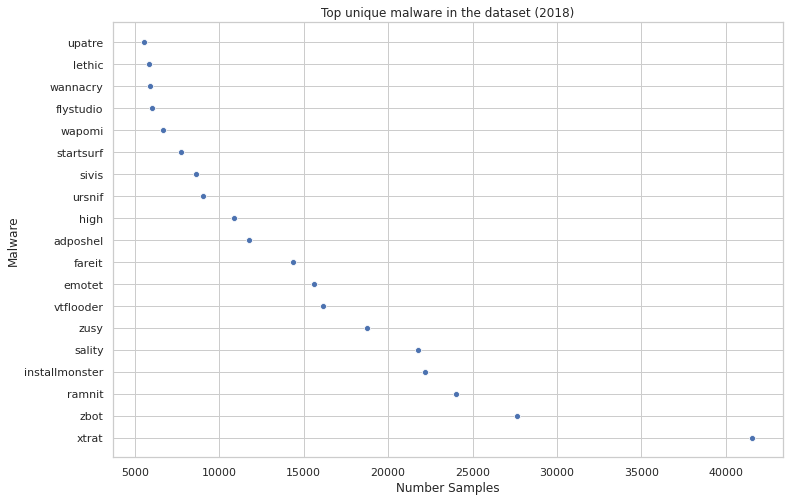

In [137]:
sns.scatterplot(x=df_plot["Number Samples"],y=df_plot["Malware"])
sns.set_style("whitegrid")
plt.title('Top unique malware in the dataset (2018)')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='avclass'>

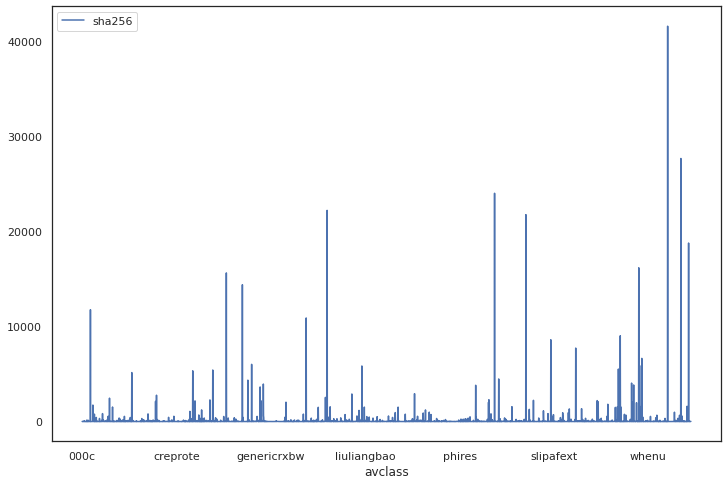

In [14]:
df_avclass.plot()

In [15]:
df_avclass.reset_index(inplace=True)

In [16]:
df_avclass.rename(columns={"avclass": "Malware"}, inplace=True)
df_avclass.sort_values(by=["sha256"],ascending=False)

,Malware,sha256
3102,xtrat,41564
3172,zbot,27656
2185,ramnit,23999
1298,installmonster,22199
2351,sality,21750
...,...,...
1907,oztar,1
1906,oyom,1
1904,oxynoxy,1
1901,ou0bsubcbkhb,1


<AxesSubplot:xlabel='Malware', ylabel='sha256'>

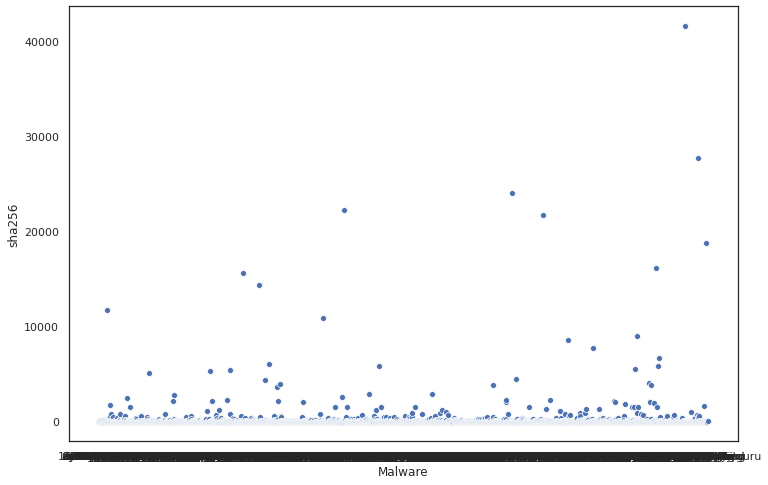

In [71]:
sns.scatterplot(x=df_avclass["Malware"],y=df_avclass["sha256"])

In [ ]:
!pip install umap-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [4]:
dir(umap)

['UMAP',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'distances',
 'layouts',
 'nndescent',
 'numba',
 'pkg_resources',
 'rp_tree',
 'sparse',
 'sparse_nndescent',
 'spectral',
 'umap_',
 'utils']

In [5]:
fit = umap.UMAP()


In [20]:
X_train[:1000].shape

(1000, 2381)

In [54]:
#%time u = fit.fit_transform(X_train[:10000], y_train[:10000])
%time u = fit.fit_transform(X_train[:10000], y_train[:10000])

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 1min 19s, sys: 3.76 s, total: 1min 23s
Wall time: 1min 28s


<AxesSubplot:>

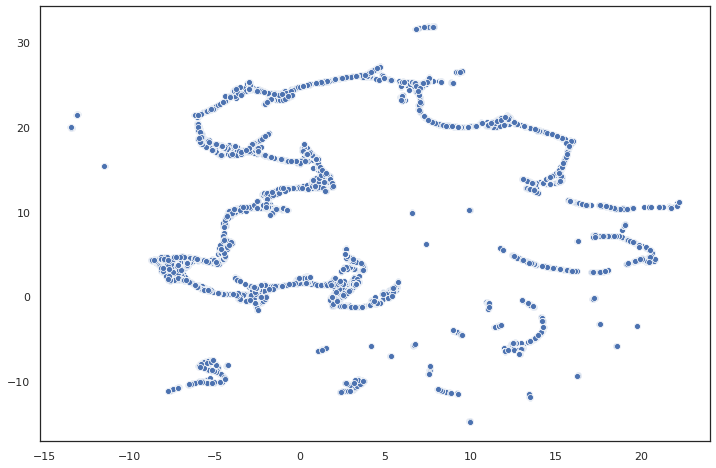

In [55]:
sns.scatterplot(x=u[:,0],y=u[:,1])

In [56]:
df_u = pd.DataFrame(u)

In [57]:
df_u;

In [58]:
df_u1 = pd.concat([df_u,pd.DataFrame(y_train[:10000],columns=["Malware"])], axis=1)

In [59]:
df_u1['Malware'].value_counts()

0.0    10000
Name: Malware, dtype: int64

<AxesSubplot:xlabel='0', ylabel='1'>

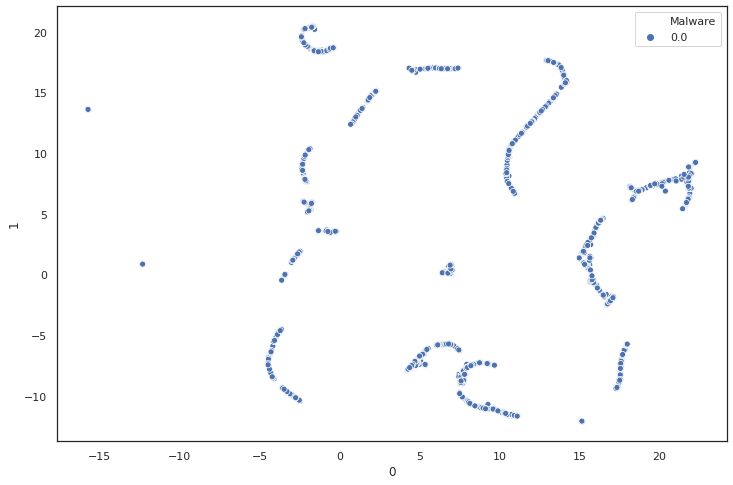

In [50]:
sns.scatterplot(x=df_u1[0],y=df_u1[1], data=df_u1, hue="Malware")

In [60]:
plotdf = emberdf.copy()
plotdf.loc[plotdf["appeared"] < "2018-01", "appeared"] = " <2018"
gbdf2 = plotdf.groupby(["appeared", "label"]).count().reset_index()
#alt.Chart(gbdf2).mark_bar().encode(
 #   alt.X('appeared:O', axis=alt.Axis(title='Month appeared')),
  #  alt.Y('sum(sha256):Q', axis=alt.Axis(title='Number of samples')),
   # alt.Color('label:N', scale=alt.Scale(range=["#00b300", "#3333ff", "#ff3333"]), legend=alt.Legend(values=["unlabeled", "benign", "malicious"]))
#)
alt.Chart(gbdf2).mark_bar().encode(
    alt.X('appeared:O', axis=alt.Axis(title='Month appeared')),
    alt.Y('sum(sha256):Q', axis=alt.Axis(title='Number of samples')),
    alt.Color('label:N')
)

alt.Chart(...)

In [61]:
df_plot2 = gbdf2

In [69]:
df_plot2;

In [63]:
df_plot2 = df_plot2[df_plot2['label'] == 1].drop('subset', axis=1).reset_index()

In [64]:
df_plot2.drop('index', axis=1, inplace=True)

In [65]:
df_plot2.rename(columns={"avclass": "Malware Samples", "appeared": "Date Appeared"}, inplace=True)

In [66]:
df_plot2

,Date Appeared,label,sha256,Malware Samples
0,2018-01,1,32491,30723
1,2018-02,1,31222,29368
2,2018-03,1,20152,19080
3,2018-04,1,26892,26061
4,2018-05,1,22193,21530
5,2018-06,1,25116,23963
6,2018-07,1,26622,25880
7,2018-08,1,21791,20590
8,2018-09,1,37062,35708
9,2018-10,1,56459,56343


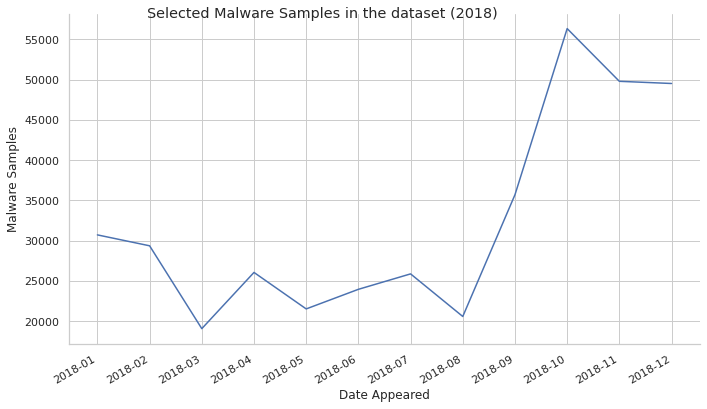

In [92]:
#sns.figsize=(12, 6)

g = sns.relplot(x="Date Appeared", y="Malware Samples", kind="line", data=df_plot2)
g.ax.grid(True)
g.fig.set_size_inches(12, 6)
g.fig.suptitle('Selected Malware Samples in the dataset (2018)')
g.fig.autofmt_xdate()